# Animating $|\psi(x)|^2$ for a Particle in an Infinite Square Well

## Resources

[Matplotlib Animation Tutorial (2012)](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

[Anmation Not Appearing in Jupyter](http://stackoverflow.com/questions/25333732/matplotlib-animation-not-working-in-ipython-notebook-blank-plot)

## Setup

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [3]:
#this fixed a problem with the animation not displaying
%matplotlib nbagg

## Animation of a traveling wave.

I copied this code from an Animation Tutorial. I used it to test animation in Jupyter.

<IPython.core.display.Javascript object>


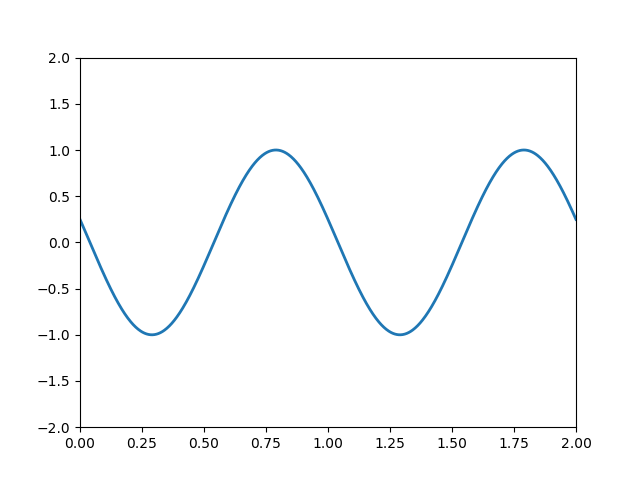

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

## Particle in a Box

The energy eigenvalues are:

$$E_n=\frac{n^2\hbar^2\pi^2}{2mL^2}$$

Eigenfunctions are:

$$\psi_n(x)=\sqrt{\frac{2}{L}}\sin(\frac{n\pi}{L}x)$$

Use 

$$E_1=\frac{(1240\ \mathrm{eV \cdot nm})^2}{8(mc^2)L^2}$$ 

with $L$ in nm and $mc^2$ in eV. Then $E_1$ has units of eV. Other energy eigenvalues are:

$$E_n=n^2E_1.$$

Then, in time-dependent wavefunction, use

$$\frac{E}{\hbar}=\frac{2\pi (3e8\ \mathrm{nm/ns})}{(1240\ \mathrm{eV \cdot nm})}E_{eV}$$

where $E_{eV}$ is in units of eV. Then $\frac{E}{\hbar}$ has units of ns$^{-1}$ and $E/\hbar t$ can be written with $t$ in ns.

In [6]:
#constants
#use x in nm and t in ns
Erest=0.511e6 #rest energy for electron in eV
L=1 #nm
E1=(1240)**2/8/Erest/L**2
Eoverhbar=2*np.pi*3e8/1240 #(eV ns)^-1

## Animate a wavefunction

$$\psi(x)=\frac{1}{\sqrt{2}}\psi_1+\frac{1}{\sqrt{2}}\psi_2$$

<IPython.core.display.Javascript object>


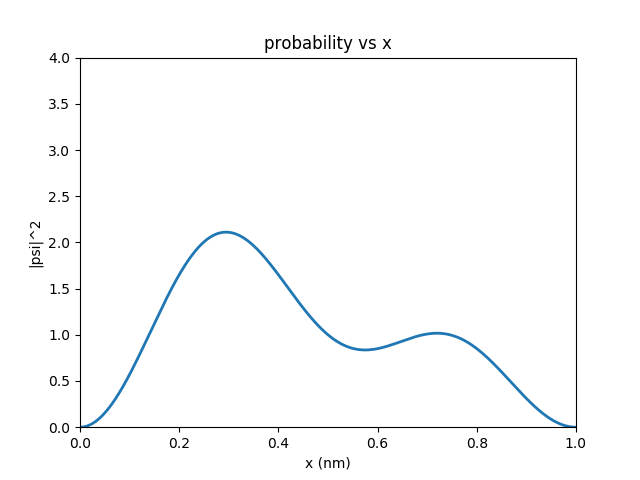

In [7]:
#constants
A=np.sqrt(2/L)
k=np.pi/L
E2=4*E1

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(t):
    #t is time in ns
    #x is in nm
    x = np.linspace(0, 1, 1000)
    psi1=A*np.sin(k*x)
    psi2=A*np.sin(2*k*x)
    psisquared=1/2*psi1**2+1/2*psi2**2+psi1*psi2*np.cos(Eoverhbar*(E2-E1)*t)
    line.set_data(x, psisquared)
    return line,

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 4))
line, = ax.plot([], [], lw=2)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=500, blit=True)
plt.xlabel('x (nm)')
plt.ylabel('|psi|^2')
plt.title("probability vs x")
plt.show()